In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Probabilidades de Erro

No processo pelo qual decidimos qual das duas hipóteses é melhor suportada pelos nossos dados, o passo final envolve um julgamento sobre a consistência dos dados e a hipótese nula. Embora este passo resulte em uma decisão correta na grande maioria das vezes, às vezes pode nos levar ao erro. O motivo é a variação aleatória. Por exemplo, mesmo quando a hipótese nula é verdadeira, a variação aleatória pode fazer com que a amostra pareça bastante diferente do que a hipótese nula prevê.

## Conclusões Erradas

Se você está testando uma hipótese nula contra a alternativa de que a hipótese nula não é verdadeira, então há quatro maneiras de classificar a realidade e o resultado do teste.

|     | Teste Favorece a Nula | Teste Favorece a Alternativa |
|----:|:-----------------------|:------------------------|
|**Nula é Verdadeira**| Resultado Correto | Erro |
|**Alternativa é Verdadeira**| Erro | Resultado Correto |

Em duas das quatro células desta tabela, o resultado do teste está errado. Um tipo de erro ocorre se o teste favorece a hipótese alternativa quando, na verdade, a hipótese nula é verdadeira. O outro tipo de erro ocorre se o teste favorece a hipótese nula quando, na verdade, a hipótese alternativa é verdadeira.

Como a hipótese nula é um modelo de chance completamente especificado, o primeiro tipo de erro tem uma probabilidade que podemos estimar. A resposta acaba sendo essencialmente o valor de corte que usamos para o valor-p. Vamos ver como.

## A Chance de um Erro
Suponha que você queira testar se uma moeda é justa ou não. Então, as hipóteses são:

**Nula:** A moeda é justa. Ou seja, os resultados são como sorteios feitos aleatoriamente com reposição de *Cara, Coroa*.

**Alternativa:** A moeda não é justa.

Suponha que você vai testar essa hipótese com base em 2000 lançamentos da moeda. Você esperaria que uma moeda justa caísse com a cara para cima 1000 vezes em 2000, então uma estatística de teste razoável para usar é

$$
\text{estatística de teste} ~ = ~ \big{\vert} ~ \text{número de caras} - 1000 ~ \big{\vert}
$$

Valores pequenos desta estatística favorecem a hipótese nula, e valores grandes favorecem a alternativa.

Nós simulamos esta estatística sob a hipótese nula muitas vezes e traçamos sua distribuição empírica.

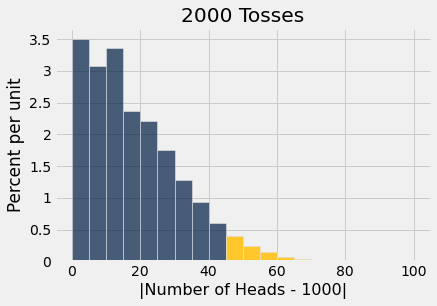

In [4]:
fair_coin = [0.5, 0.5]

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin).item(0)
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = make_array()
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

results = Table().with_column('|Number of Heads - 1000|', statistics)
results.hist(bins = np.arange(0, 101, 5), left_end=45)
plots.title('2000 Tosses');

A área à direita de 45, dourada, está pouco menos de 5%.

In [5]:
np.count_nonzero(statistics >= 45) / repetitions

0.04654

Grandes valores da estatística de teste favorecem a hipótese alternativa. Portanto, se você quiser usar um limite de 5% para o valor-p, sua regra de decisão seria concluir que a moeda é injusta se a estatística de teste for 45 ou mais.

No entanto, como mostra a figura, uma moeda justa pode produzir estatísticas de teste com valores de 45 ou mais. De fato, isso ocorre com uma chance aproximadamente de 5%.

Resumo: *Se a moeda for justa* e nosso teste usar um limite de 5% para decidir se é justa ou não, então há cerca de 5% de chance de o teste concluir erroneamente que a moeda é injusta.

## O Limite para o Valor-p é uma Probabilidade de Erro
O exemplo acima é um caso especial de um fato geral:

**Se você usar um limite de $p$% para o valor-p, e a hipótese nula acontece de ser verdadeira, então há cerca de $p$% de chance de que seu teste concluirá que a hipótese alternativa é verdadeira.**

Aqui está a tabela dos quatro possíveis resultados da realidade/teste novamente. As probabilidades na linha superior são calculadas sob a suposição de que a hipótese nula é verdadeira. O valor-p é a probabilidade do erro mostrado em vermelho.

|     | Teste Favorece a Hipótese Nula | Teste Favorece a Hipótese Alternativa |
|----:|:-----------------------|:------------------------|
|**Nula é Verdadeira**| Resultado Correto | <p style="color:red;"><b>Erro</b></p> |
|**Alternativa é Verdadeira**| Erro | Resultado Correto |

### Controle para o Erro ###
O limite de 1% é, portanto, mais conservador do que o de 5%. Com o limite de 1%, há menos chance de concluir "alternativa" se a nulidade acontecer de ser verdadeira. Por esse motivo, ensaios clínicos randomizados de tratamentos médicos geralmente usam 1% como o limite para decidir entre as duas seguintes hipóteses:

**Nula:** O tratamento não tem efeito; as diferenças observadas entre os resultados dos grupos de tratamento e controle de pacientes são devido à randomização.

**Alternativa:** O tratamento tem um efeito.

A ideia é controlar a chance de concluir que o tratamento faz algo se, na verdade, ele não faz nada. Isso reduz o risco de dar aos pacientes um tratamento inútil.

Ainda assim, mesmo que você defina o limite tão baixo quanto 1%, e o tratamento não faça nada, há cerca de 1% de chance de concluir que o tratamento faz algo. Isso se deve à variação aleatória. Existe uma pequena chance de que dados de amostras aleatórias acabem te levando ao erro. A vantagem da amostragem aleatória é que você pode encontrar essa chance.

## Data Snooping e p-Hacking
A discussão acima implica que se cada um dos 100 diferentes grupos de pesquisa executar um experimento controlado randomizado separado sobre o efeito de um tratamento que na verdade não tem efeito, e cada experimento usar um limite de 1% para o valor-p, então, por variação aleatória, espera-se que um dos experimentos conclua erroneamente que o tratamento tem efeito.

Infelizmente, esse pode ser o experimento que será publicado. Por isso, é importante que os experimentos sejam *replicados*. Ou seja, outros pesquisadores devem ser capazes de realizar o experimento e ver se obtêm resultados semelhantes.

Não é incomum que os pesquisadores testem múltiplas hipóteses usando os mesmos dados. Por exemplo, em um ensaio clínico randomizado sobre o efeito de um medicamento, os pesquisadores podem testar se o medicamento tem efeito sobre várias doenças diferentes.

Agora suponha que o medicamento não tenha efeito em nada. Apenas por variação aleatória, uma pequena porcentagem dos testes pode concluir que ele tem um efeito. Portanto, ao ler um estudo que usa testes de hipóteses e conclui que um tratamento tem efeito, sempre pergunte quantos efeitos diferentes foram testados antes dos pesquisadores encontrarem aquele que foi relatado.

Se os pesquisadores executaram múltiplos testes diferentes antes de encontrar um que deu um resultado "altamente estatisticamente significativo", use o resultado com cautela. O estudo pode estar prejudicado pelo *data snooping*, que essencialmente significa torturar os dados para obter uma falsa confissão. Isso às vezes também é chamado de *p-hacking*.

Em tal situação, uma maneira de validar o resultado relatado é replicar o experimento e testar apenas esse efeito particular. Se ele continuar sendo significativo, isso validará a conclusão original.

## Nota Técnica: O Outro Tipo de Erro
Há, é claro, outro tipo de erro: concluir que o tratamento não faz nada quando na verdade faz algo. Discussões sobre esse erro estão fora do escopo deste curso. Apenas esteja ciente de que a vida não é fácil: se você configurar seu teste para reduzir um dos dois erros, quase sempre aumentará o outro.